In [97]:
import pandas as pd
import numpy as np
import csv
import string

import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import widgets, interactive

from bokeh.io import output_notebook, show
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [98]:
dfDirtyy = pd.read_csv("GlobalTemperatures.csv",encoding='cp1252')
dfDirtyy.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
dfDirty = dfDirtyy.dropna(subset=["dt","LandAverageTemperature","LandAverageTemperatureUncertainty",
                                  "LandMaxTemperature","LandMaxTemperatureUncertainty",
                                  "LandMinTemperature","LandMinTemperatureUncertainty"]).copy()
dfDirty.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [100]:
dfDirty['Year'] = pd.DatetimeIndex(dfDirty['dt']).year
dfDirty.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850


In [101]:
df = dfDirty.groupby(['Year'], as_index=False).mean()
df.head()

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417


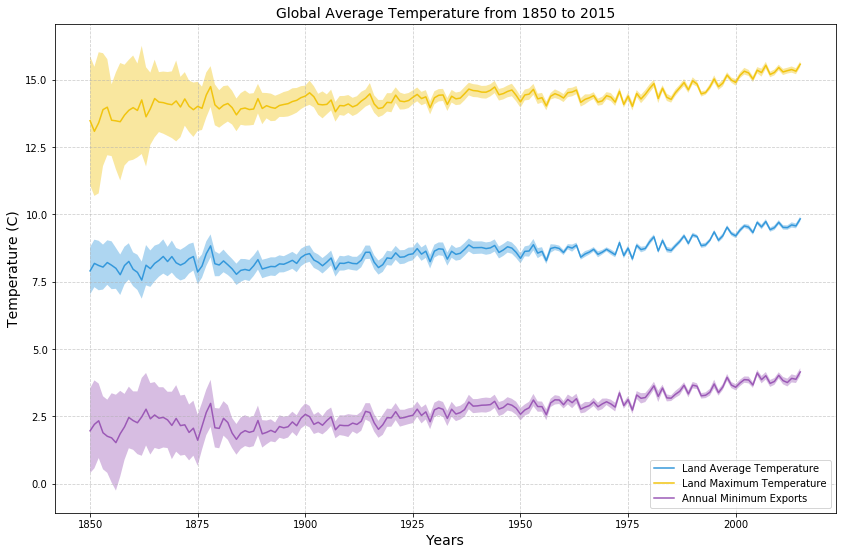

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,9))

plt.plot(df['Year'], df['LandAverageTemperature'],label='Land Average Temperature',
         color='#3498DB');  
plt.fill_between(df['Year'], df['LandAverageTemperature']-df['LandAverageTemperatureUncertainty'], 
                 df['LandAverageTemperature']+df['LandAverageTemperatureUncertainty'],
                 facecolor='#AED6F1');
plt.plot(df['Year'], df['LandMaxTemperature'], label='Land Maximum Temperature',
         color='#F1C40F');
plt.fill_between(df['Year'], df['LandMaxTemperature']-df['LandMaxTemperatureUncertainty'], 
                 df['LandMaxTemperature']+df['LandMaxTemperatureUncertainty'],
                 facecolor='#F9E79F');
plt.plot(df['Year'], df['LandMinTemperature'], label='Annual Minimum Exports',
         color='#9B59B6');
plt.fill_between(df['Year'], df['LandMinTemperature']-df['LandMinTemperatureUncertainty'], 
                 df['LandMinTemperature']+df['LandMinTemperatureUncertainty'],
                 facecolor='#D7BDE2');


plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Temperature (C)', fontsize=14)
plt.title('Global Average Temperature from 1850 to 2015', fontsize=14)
plt.legend(loc=4)
plt.show() 

In [197]:
dfDirty['Month'] = pd.DatetimeIndex(dfDirty['dt']).month

dfDirty['Month'] = dfDirty['Month'].replace(3, 'Spring')
dfDirty['Month'] = dfDirty['Month'].replace(4, 'Spring')
dfDirty['Month'] = dfDirty['Month'].replace(5, 'Spring')
dfDirty['Month'] = dfDirty['Month'].replace(6, 'Summer')
dfDirty['Month'] = dfDirty['Month'].replace(7, 'Summer')
dfDirty['Month'] = dfDirty['Month'].replace(8, 'Summer')
dfDirty['Month'] = dfDirty['Month'].replace(9, 'Autumn')
dfDirty['Month'] = dfDirty['Month'].replace(10, 'Autumn')
dfDirty['Month'] = dfDirty['Month'].replace(11, 'Autumn')
dfDirty['Month'] = dfDirty['Month'].replace(12, 'Winter')
dfDirty['Month'] = dfDirty['Month'].replace(1, 'Winter')
dfDirty['Month'] = dfDirty['Month'].replace(2, 'Winter')

dfS = dfDirty[['Month','Year','LandAverageTemperature']]

In [198]:
for i in range(0,10):
    dfS['Year'] = dfS['Year'].replace(1850+i,1850)
    dfS['Year'] = dfS['Year'].replace(1860+i,1860)
    dfS['Year'] = dfS['Year'].replace(1870+i,1870)
    dfS['Year'] = dfS['Year'].replace(1880+i,1880)
    dfS['Year'] = dfS['Year'].replace(1890+i,1890)
    dfS['Year'] = dfS['Year'].replace(1900+i,1900)
    dfS['Year'] = dfS['Year'].replace(1910+i,1910)
    dfS['Year'] = dfS['Year'].replace(1920+i,1920)
    dfS['Year'] = dfS['Year'].replace(1930+i,1930)
    dfS['Year'] = dfS['Year'].replace(1940+i,1940)
    dfS['Year'] = dfS['Year'].replace(1950+i,1950)
    dfS['Year'] = dfS['Year'].replace(1960+i,1960)
    dfS['Year'] = dfS['Year'].replace(1970+i,1970)
    dfS['Year'] = dfS['Year'].replace(1980+i,1980)
    dfS['Year'] = dfS['Year'].replace(1990+i,1990)
    dfS['Year'] = dfS['Year'].replace(2000+i,2000)
    dfS['Year'] = dfS['Year'].replace(2010+i,2010)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [199]:
dfS = dfS.groupby(['Month','Year'], as_index=False).mean()
dfS

,Month,Year,LandAverageTemperature
0,Autumn,1850,8.418733
1,Autumn,1860,8.661100
2,Autumn,1870,8.809600
3,Autumn,1880,8.542867
4,Autumn,1890,8.810700
5,Autumn,1900,8.854333
6,Autumn,1910,8.844700
7,Autumn,1920,9.160467
8,Autumn,1930,9.262400
9,Autumn,1940,9.321900


In [110]:
from scipy import stats
from bivar import *
from bokeh.plotting import output_file, show, gridplot
import seaborn as sns

In [200]:
data = dfS.pivot('Month','Year','LandAverageTemperature')
data

Year,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Month,,,,,,,,,,,,,,,,,
Autumn,8.418733,8.661100,8.809600,8.542867,8.810700,8.854333,8.844700,9.160467,9.262400,9.321900,9.136667,9.191333,9.136000,9.318200,9.571067,10.025400,10.205278
Spring,7.677733,7.683333,7.975633,7.756200,7.742733,7.908833,7.917233,8.125233,8.205667,8.410400,8.278300,8.260867,8.425633,8.644433,8.841900,9.277267,9.393778
Summer,13.619267,13.633567,13.801467,13.473567,13.573133,13.596267,13.621967,13.703033,13.900867,13.918800,13.860433,13.834433,13.849533,14.091800,14.349833,14.595033,14.792278
Winter,2.543800,2.441067,2.521167,2.414467,2.475100,2.670467,2.739500,2.981933,3.197767,3.250567,3.207933,3.245867,3.222433,3.591533,3.857933,4.077867,4.098389


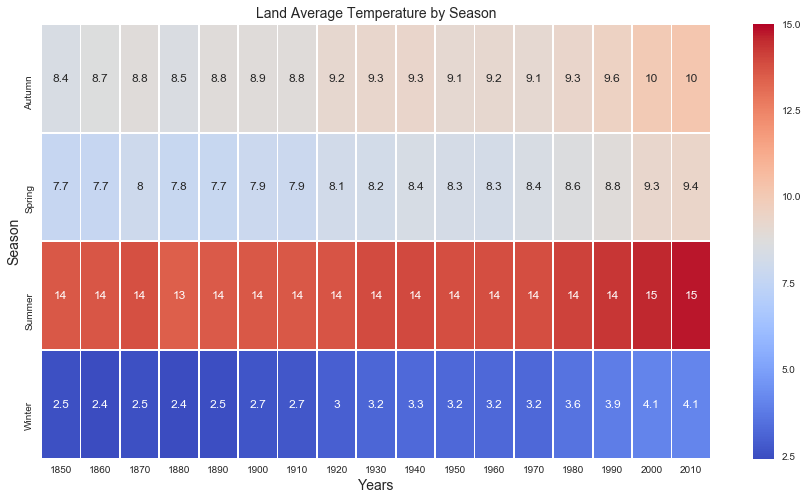

In [242]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.heatmap(data, annot=True, linewidths=.8, ax=ax, vmax=15, cmap="coolwarm")

plt.xlabel('Years', fontsize=14)
plt.ylabel('Season', fontsize=14)
plt.title('Land Average Temperature by Season', fontsize=14)
plt.show() 